In [1]:
from sklearn import tree

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import cross_val_score

In [4]:
max_depth_values = range(1, 100)

In [5]:
animals_data = pd.read_csv('dogs_n_cats.csv')
animals_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [6]:
X_animal_train = animals_data.drop('Вид', axis=1)
X_animal_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [7]:
y_animal_train = animals_data['Вид']
y_animal_train

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [8]:
animals_scores_data = pd.DataFrame()

In [12]:
for max_depth in max_depth_values:
    animals_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    mean_cross_val_score = cross_val_score(animals_tree, X_animal_train, y_animal_train, cv=5).mean()
    
    temp_data = pd.DataFrame({'max_depth' : [max_depth], 'cross_score' : [mean_cross_val_score]})
    animals_scores_data = animals_scores_data.append(temp_data)

In [13]:
animals_scores_data

,max_depth,cross_score
0,1,1.0
0,2,1.0
0,3,1.0
0,4,1.0
0,5,1.0
...,...,...
0,95,1.0
0,96,1.0
0,97,1.0
0,98,1.0


In [14]:
best_animal_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
best_animal_clf.fit(X_animal_train, y_animal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 163.07999999999998, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]\nclass = Собачка'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]\nclass = Собачка'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]\nclass = Котик')]

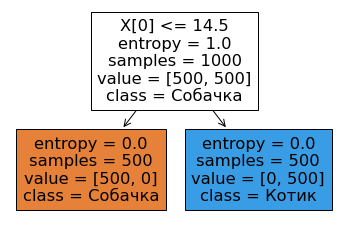

In [16]:
tree.plot_tree(best_animal_clf, class_names=['Собачка', 'Котик'], filled=True)